In [24]:
%config IPCompleter.greedy=True

In [25]:
from IPython.display import clear_output, display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pandas

In [26]:
data = pandas.read_csv("./sample_fake_salary_data.csv", ",")

In [27]:
data.head()

,age,is_male,yrs_experience,knows_ml,salary
0,65,1,28,1,180515
1,85,1,40,0,192190
2,78,0,8,1,222211
3,48,1,34,1,221250
4,58,0,18,1,201975


In [28]:
#plt.plot(data.iloc[:,0]);

In [29]:
#data.columns.size
X = data.iloc[:,0:data.columns.size - 1]
Y = data.iloc[:,data.columns.size-1]

In [30]:
X.head()

,age,is_male,yrs_experience,knows_ml
0,65,1,28,1
1,85,1,40,0
2,78,0,8,1
3,48,1,34,1
4,58,0,18,1


In [31]:
Y.head()

0    180515
1    192190
2    222211
3    221250
4    201975
Name: salary, dtype: int64

In [36]:
def gd(X, Y, iters = 1000, lr = 0.000001):
    # we are minimizing the function MSE = (Y - Y^)^2
    # let Y = predictor
    # let Y^_i = w0x0 + w1x1 + w2x2 + ... + wnxn
    # lets define a cost function J to = the partial derivative of Y with respect to Y^
    # we can break this up with math like the following
    # J = (pdY / pdY^ ) * (pdY^ / pdw)
    # (pdY / pdY^) = 2(Y - Y^) * (-1)
    # (pdY^ / pdw) = x_i
    # finally our cost function J = 2 (Y - Y^) * (-X)
    # ^^^ is the vectorized form of all X. We can use sigma notation like the below
    # J = (sigma from 0-n) (Yi -Y^i) * (-Xi) 
    
    # gradient decent
    # w = lr*cost + w
    
    w = np.random.rand(X.columns.size)    
    costs = []
    
    index = 0;
    while(index < iters):
        Y_hat = X.dot(w)                
        delta = Y - Y_hat;                    
    
        step = X.T.dot(delta)
        
        #take a step in the direction of the gradient
        w = (lr * step) + w;
        
        cost = (delta).dot(delta)        
        costs.append(cost);

        if(index % 100 == 0):
            clear_output(wait=True);
            print(index, cost);
        
        index = index + 1;        
    
    #plt.plot(costs);
    plt.plot(costs, label='Costs');
    plt.legend();
    plt.figure();
    plt.plot(Y, label="Y");
    plt.plot(Y_hat, label="Y_hat");
    plt.legend();
    
    print (w)
    
    return;

900 555330335853.1537
age               2076.871058
is_male             25.492714
yrs_experience     904.304550
knows_ml            23.357679
dtype: float64


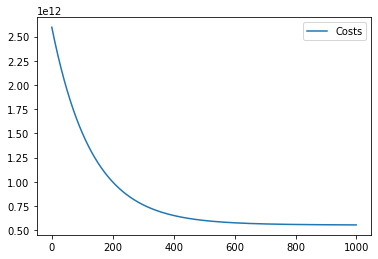

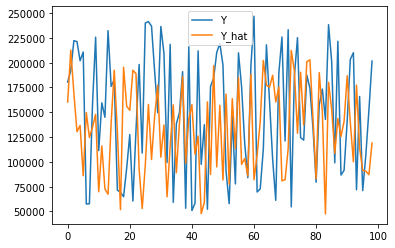

In [37]:
gd(X,Y, 1000, 0.00000001)